In [8]:
import cv2 
import os 
import matplotlib.pyplot as plt 
import numpy as np

In [19]:
foreground = cv2.imread('./data/cav_04-18_0069.png')
background = cv2.imread("./data/withoutCav.png")


In [17]:
print(f"The size of the background is {foreground.shape} and the size of the background is {background.shape}")

The size of the background is (245, 164, 3) and the size of the background is (244, 166, 3)


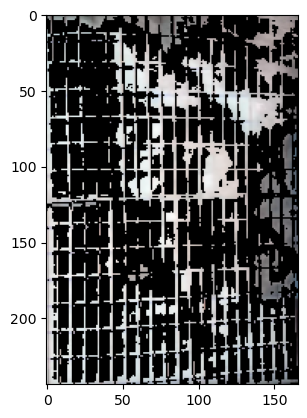

In [22]:
# Ensure both images have the same size
height, width, _ = background.shape
foreground = cv2.resize(foreground, (width, height))

# Convert images to grayscale
foreground_gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

# Compute the absolute difference between the two images
diff = cv2.absdiff(foreground_gray, background_gray)

# Threshold the difference to create a binary mask
_, mask = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Apply the mask to the foreground image
result = cv2.bitwise_and(foreground, foreground, mask=mask)

# Display the result
plt.imshow(result)

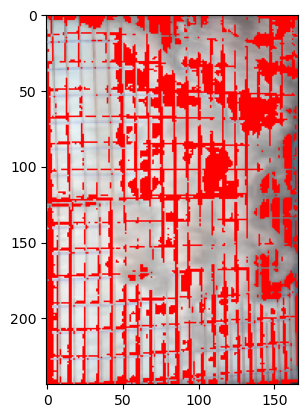

In [23]:
# Ensure both images have the same size
height, width, _ = background.shape
foreground = cv2.resize(foreground, (width, height))

# Convert images to grayscale
foreground_gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

# Compute the absolute difference between the two images
diff = cv2.absdiff(foreground_gray, background_gray)

# Threshold the difference to create a binary mask
_, mask = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Create a blue image with the same size as the foreground
blue_background = np.full_like(foreground, (255, 0, 0), dtype=np.uint8)

# Copy the blue color to the result where the mask is white
result = np.where(mask[:, :, None], blue_background, foreground)
plt.imshow(result)